# Importing the needed packages

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [46]:
# Importing the Airport_Codes dataset
df_Airport_Codes = pd.read_csv ('Airport_Codes.csv')
# Importing the Flights dataset
df_Flights = pd.read_csv('Flights.csv')
# Importing the Tickets dataset
df_Tickets = pd.read_csv('Tickets.csv')

In [47]:
print(df_Airport_Codes.info())
print(df_Flights.info())
print(df_Tickets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7  

# Data Quality Check and Cleansing
### Airport_Codes dataset

### Checking duplicated rows (airport codes)

In [48]:
#Finding duplicates and deleting them
print (len(df_Airport_Codes))
print (len(df_Airport_Codes.drop_duplicates()))
df_Airport_Codes=df_Airport_Codes.drop_duplicates()

55369
55268


In [49]:
# Checking unique values in TYPE column
df_Airport_Codes['TYPE'].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [50]:
# Subset the DataFrame to including only data about the medium and large airports. 
df_Airport_Codes = df_Airport_Codes[(df_Airport_Codes["TYPE"] == "medium_airport")|(df_Airport_Codes["TYPE"] == "large_airport")]
df_Airport_Codes = df_Airport_Codes[df_Airport_Codes["ISO_COUNTRY"] == "US"]
print (len(df_Airport_Codes))

858


### Removing Unnecessary Columns(airport codes)

In [51]:
# Removing Unneccesary columns 
df_Airport_Codes=df_Airport_Codes.drop(['NAME','CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES','ELEVATION_FT'],axis=1)
df_Airport_Codes.shape

(858, 2)

### Handle null value(airport codes)

In [52]:
# Checking missing value 
def check_missing_data(df):
    return df.isnull().sum().sort_values()
check_missing_data(df_Airport_Codes)

TYPE          0
IATA_CODE    37
dtype: int64

In [53]:
# Checking percentage of the missing value
def check_percent_of_missing_data(df):
    return (sum(df.isnull().sum()) * 100 /len(df))
check_percent_of_missing_data(df_Airport_Codes)

4.312354312354312

In [54]:
# Dropping the missing value
def drop_na(cols,df):
    return df.dropna(subset = [cols])
df_Airport_Codes = drop_na('IATA_CODE', df_Airport_Codes)
print(len(drop_na('IATA_CODE', df_Airport_Codes)))

821


### Reset the indices

In [55]:
# Reset the indices from 0, avoiding the indices to be out of order
df_Airport_Codes.reset_index(drop=True, inplace = True)
df_Airport_Codes

,TYPE,IATA_CODE
0,medium_airport,WKK
1,medium_airport,ABE
2,medium_airport,ABI
3,large_airport,ABQ
4,medium_airport,ABR
...,...,...
816,medium_airport,OGG
817,medium_airport,BSF
818,medium_airport,ITO
819,medium_airport,UPP


# Data Quality Check and Cleansing
### Flights dataset

### Checking duplicated rows (Flights)

In [56]:
#Finding duplicates and deleting them
print (len(df_Flights))
print (len(df_Flights.drop_duplicates()))
df_Flights=df_Flights.drop_duplicates()

1915886
1911341


In [57]:
# Checking unique values in CANCELLED column
df_Flights['CANCELLED'].unique()

array([0., 1.])

In [58]:
# Subset the DataFrame to including only data about the not canceled flights. 
df_Flights = df_Flights[df_Flights['CANCELLED'] == 0]
print (len(df_Flights))

1859862


### Removing Unnecessary columns(Flights)

In [59]:
# Removing Unneccesary columns 
df_Flights=df_Flights.drop(['OP_CARRIER','FL_DATE','OP_CARRIER_FL_NUM','CANCELLED','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'],axis=1)
df_Flights.shape

(1859862, 10)

### Handling Nonsense Value(Flights)

In [60]:
# typecasting some object columns to float
def fix_data_format(col,df): 
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')
fix_data_format('DISTANCE',df_Flights)
fix_data_format('AIR_TIME',df_Flights)
print(df_Flights.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859862 entries, 0 to 1911340
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   TAIL_NUM          object 
 1   ORIGIN            object 
 2   ORIGIN_CITY_NAME  object 
 3   DESTINATION       object 
 4   DEST_CITY_NAME    object 
 5   DEP_DELAY         float64
 6   ARR_DELAY         float64
 7   AIR_TIME          float64
 8   DISTANCE          float64
 9   OCCUPANCY_RATE    float64
dtypes: float64(5), object(5)
memory usage: 156.1+ MB
None


### Handling Null Value (Flights)

In [61]:
# Checking missing value and the percentage of the missing value(use the function already created)
print(check_missing_data(df_Flights))
print(check_percent_of_missing_data(df_Flights))

TAIL_NUM               0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DESTINATION            0
DEST_CITY_NAME         0
DEP_DELAY              0
OCCUPANCY_RATE        31
DISTANCE             268
ARR_DELAY           4368
AIR_TIME            4616
dtype: int64
0.4991230532157762


In [62]:
# The missing data for each dataframe is less than 1%. So I'd like to drop them.
df_Flights = df_Flights.dropna()
print (len(df_Flights))

1855044


### Handling Outliers (Flights)

In [63]:
## Summary statistics for each data column.
df_Flights.describe(include= 'all')

,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE
count,1855044,1855044,1855044,1855044,1855044,1855044.00,1855044.00,1855044.00,1855044.00,1855044.00
unique,6026,361,355,361,355,NaN,NaN,NaN,NaN,NaN
top,N485HA,ATL,"Chicago, IL",ATL,"Chicago, IL",NaN,NaN,NaN,NaN,NaN
freq,928,92693,104067,92686,103906,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.74,5.66,109.34,771.92,0.65
std,NaN,NaN,NaN,NaN,NaN,49.98,52.43,70.26,581.44,0.20
min,NaN,NaN,NaN,NaN,NaN,-63.00,-94.00,-121.00,-1947.00,0.30
25%,NaN,NaN,NaN,NaN,NaN,-6.00,-15.00,59.00,344.00,0.48
50%,NaN,NaN,NaN,NaN,NaN,-2.00,-6.00,91.00,612.00,0.65
75%,NaN,NaN,NaN,NaN,NaN,7.00,8.00,139.00,1013.00,0.82


In [64]:
# It shows that the minimum air time is too short and maximum air time is too long which are both unreasonable
# The minimum distance is too short, and maximum distance is too long which are both unreasonable
# Occupancy rate should between 0 and 1

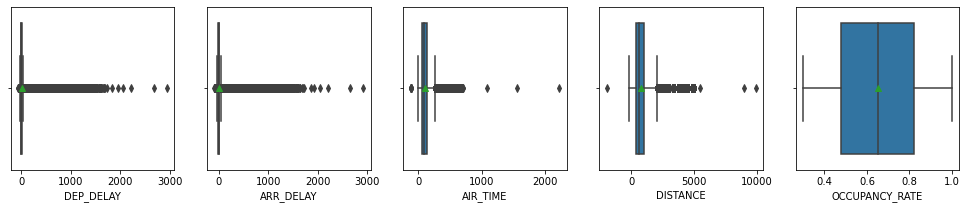

In [65]:
# boxplot for numeric variable
fig, ax =plt.subplots(1,5,figsize=(17, 3))
sns.boxplot(x='DEP_DELAY',data=df_Flights,ax=ax[0], showmeans=True)
sns.boxplot(x='ARR_DELAY',data=df_Flights,ax=ax[1], showmeans=True)
sns.boxplot(x='AIR_TIME',data=df_Flights,ax=ax[2], showmeans=True)
sns.boxplot(x='DISTANCE',data=df_Flights,ax=ax[3], showmeans=True)
sns.boxplot(x='OCCUPANCY_RATE',data=df_Flights,ax=ax[4], showmeans=True)
fig.show()

In [66]:
# Based on the fact, I searched for air times and distance within the United States, 
# the shortest flight was a 30-minute nonstop flight from Los Angeles to San Francisco, a distance of 310 miles,
# and the longest flight was from Boston to Honolulu, a distance of about 600 minutes and a distance of 5,100 miles
# Beyond this range I consider them as outliers, so some of the outliers shown in boxplot are true value
df_Flights = df_Flights[(df_Flights["AIR_TIME"]>=30)&(df_Flights["AIR_TIME"]<=600)]
df_Flights = df_Flights[(df_Flights["DISTANCE"]>=310)&(df_Flights["DISTANCE"]<=5100)]
df_Flights = df_Flights[(df_Flights["OCCUPANCY_RATE"]<=1)&(df_Flights["OCCUPANCY_RATE"]>=0)]
#For the arrive time, I'd believe that (-94,2923)is a normal range,same as the departure time's range(-64,2941), so I keep the original data. 
print(df_Flights.shape)

(1467082, 10)


### Reset the indices

In [67]:
# Reset the indices from 0, avoiding the indices to be out of order
df_Flights.reset_index(drop=True, inplace = True)
df_Flights

,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,N955WN,RSW,"Fort Myers, FL",CLE,"Cleveland, OH",-8.00,-6.00,143.00,1025.00,0.97
1,N8686A,RSW,"Fort Myers, FL",CMH,"Columbus, OH",1.00,5.00,135.00,930.00,0.55
2,N201LV,RSW,"Fort Myers, FL",CMH,"Columbus, OH",0.00,4.00,132.00,930.00,0.91
3,N413WN,RSW,"Fort Myers, FL",CMH,"Columbus, OH",11.00,14.00,136.00,930.00,0.67
4,N7832A,RSW,"Fort Myers, FL",DAL,"Dallas, TX",0.00,-17.00,151.00,1005.00,0.62
...,...,...,...,...,...,...,...,...,...,...
1467077,N412WN,RSW,"Fort Myers, FL",SAN,"San Diego, CA",-2.00,-4.00,164.00,1105.00,0.36
1467078,N8317M,RSW,"Fort Myers, FL",MDW,"Chicago, IL",-2.00,11.00,173.00,2213.00,0.35
1467079,N223WN,RSW,"Fort Myers, FL",MDW,"Chicago, IL",1.00,1.00,166.00,2312.00,0.67
1467080,N8574Z,RSW,"Fort Myers, FL",PIT,"Pittsburgh, PA",-6.00,-17.00,32.00,2232.00,0.88


# Data Quality Check and Cleansing
### Tickets dataset

### Checking Duplicated Rows(Tickets)

In [68]:
#Finding duplicates and deleting them
print (len(df_Tickets))
print (len(df_Tickets.drop_duplicates()))
df_Tickets=df_Tickets.drop_duplicates()

1167285
1095387


In [69]:
# Checking unique values in ROUNDTRIP column
df_Tickets['ROUNDTRIP'].unique()

array([1., 0.])

In [70]:
# Subseting the dataframe to include only data about the round trip tickets.
df_Tickets = df_Tickets[df_Tickets['ROUNDTRIP'] == 1]
print (len(df_Tickets))

661036


### Removing Unnecessary columns(Tickets)

In [71]:
# Removing Unneccesary columns 
df_Tickets=df_Tickets.drop(['ITIN_ID','YEAR','QUARTER','ORIGIN_COUNTRY','ORIGIN_STATE_ABR','ROUNDTRIP','REPORTING_CARRIER'],axis=1)
df_Tickets.shape

(661036, 5)

### Handling Nonsense Value(Tickets)

In [72]:
# typecasting some object columns to float
fix_data_format('ITIN_FARE',df_Tickets)
print(df_Tickets.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661036 entries, 0 to 1115067
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ORIGIN           661036 non-null  object 
 1   ORIGIN_STATE_NM  661036 non-null  object 
 2   PASSENGERS       660076 non-null  float64
 3   ITIN_FARE        659379 non-null  float64
 4   DESTINATION      661036 non-null  object 
dtypes: float64(2), object(3)
memory usage: 30.3+ MB
None


### Handling Null Value(Tickets)

In [73]:
# Checking missing value and the percentage of the missing value(use the function already created)
print(check_missing_data(df_Tickets))
print(check_percent_of_missing_data(df_Tickets))

ORIGIN                0
ORIGIN_STATE_NM       0
DESTINATION           0
PASSENGERS          960
ITIN_FARE          1657
dtype: int64
0.3958937183451431


In [74]:
# The missing data for each dataframe is less than 1%. So I'd like to drop them.
df_Tickets = df_Tickets.dropna()
print (len(df_Tickets))

658426


### Handling Outliers(Tickets)

In [75]:
## Summary statistics for each data column.
df_Tickets.describe(include= 'all')

,ORIGIN,ORIGIN_STATE_NM,PASSENGERS,ITIN_FARE,DESTINATION
count,658426,658426,658426.00,658426.00,658426
unique,409,52,NaN,NaN,392
top,ORD,California,NaN,NaN,LAS
freq,19047,69631,NaN,NaN,25286
mean,NaN,NaN,1.96,473.25,NaN
std,NaN,NaN,5.15,344.20,NaN
min,NaN,NaN,1.00,0.00,NaN
25%,NaN,NaN,1.00,280.00,NaN
50%,NaN,NaN,1.00,415.00,NaN
75%,NaN,NaN,1.00,595.00,NaN


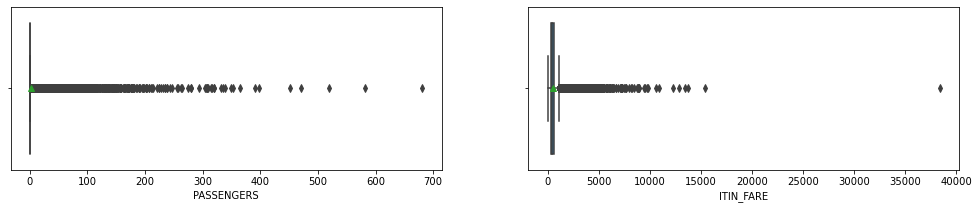

In [76]:
# boxplot for numeric variable
fig, ax =plt.subplots(1,2,figsize=(17, 3))
sns.boxplot(x='PASSENGERS',data=df_Tickets,ax=ax[0], showmeans=True)
sns.boxplot(x='ITIN_FARE',data=df_Tickets,ax=ax[1], showmeans=True)
fig.show()

In [77]:
# Because the tickets data is randomly sampled data, 
#By Boxplot we see that Fare above 15000 is very high as we see on the boxplot. So I'd like to assume that fare is between 20 and 15000
#It told that the ideal capacity is 200, so we could see the passengers over 300 is outliers. So I'd like to assume number of passengers is between 0 and 300
# Beyond this range I consider them as outliers
df_Tickets = df_Tickets[(df_Tickets['PASSENGERS']>0)&(df_Tickets["PASSENGERS"]<=300)]
#calculate the IQR (interquartile range) of ITIN_FARE variable
a = np.quantile(df_Tickets['ITIN_FARE'], 0.75)  
b = np.quantile(df_Tickets['ITIN_FARE'], 0.25)   
up = a + 1.5 * (a - b)  
down = b - 1.5 * (a - b) 
print(down,up)

-192.5 1067.5


In [78]:
a = df_Tickets[(df_Tickets['ITIN_FARE']<=down)|(df_Tickets["ITIN_FARE"]>=up)]
outliers = len(a)
percentage_outliers = outliers / len(df_Tickets)
print(percentage_outliers)

0.043660123571545736


In [79]:
df_Tickets = df_Tickets[(df_Tickets['ITIN_FARE']>=down)&(df_Tickets["ITIN_FARE"]<=up)]
print(df_Tickets.shape)

(629658, 5)


### Reset the Indices

In [80]:
# Reset the indices from 0, avoiding the indices to be out of order
df_Tickets.reset_index(drop=True, inplace = True)
df_Tickets

,ORIGIN,ORIGIN_STATE_NM,PASSENGERS,ITIN_FARE,DESTINATION
0,ABI,Texas,1.00,736.00,DAB
1,ABI,Texas,1.00,570.00,COS
2,ABI,Texas,1.00,564.00,MCO
3,ABI,Texas,1.00,345.00,LGA
4,ABI,Texas,1.00,425.00,LIT
...,...,...,...,...,...
629653,YUM,Arizona,1.00,585.00,FLL
629654,YUM,Arizona,1.00,692.00,ALB
629655,YUM,Arizona,1.00,600.00,MRY
629656,YUM,Arizona,1.00,705.00,ELP


In [81]:
print(df_Airport_Codes.info())
print(df_Flights.info())
print(df_Tickets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TYPE       821 non-null    object
 1   IATA_CODE  821 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467082 entries, 0 to 1467081
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   TAIL_NUM          1467082 non-null  object 
 1   ORIGIN            1467082 non-null  object 
 2   ORIGIN_CITY_NAME  1467082 non-null  object 
 3   DESTINATION       1467082 non-null  object 
 4   DEST_CITY_NAME    1467082 non-null  object 
 5   DEP_DELAY         1467082 non-null  float64
 6   ARR_DELAY         1467082 non-null  float64
 7   AIR_TIME          1467082 non-null  float64
 8   DISTANCE          1467082 non-null  float64
 9   OCCUPANCY_RATE    1467082 non-null  f

## Merging Airport_Codes and Flights into a single file

In [82]:
final_temp = pd.merge(df_Flights,df_Airport_Codes, how='inner', left_on='ORIGIN',right_on='IATA_CODE')
final_temp = pd.merge(final_temp,df_Airport_Codes, how='inner', left_on='DESTINATION',right_on='IATA_CODE',suffixes=('_ORIGIN', '_DES'))
final_temp.drop(columns={'IATA_CODE_ORIGIN','IATA_CODE_DES'},inplace=True)

In [83]:
Routes=[]
Route=[]
for i in range(final_temp.shape[0]):
    Route=[final_temp['ORIGIN'].iloc[i],final_temp['DESTINATION'].iloc[i]]
    Routes.append(sorted(Route))
final_temp.insert(11, 'Routes', Routes)

In [41]:
Routes=[]
Route=[]
for i in range(final_temp.shape[0]):
    Route=final_temp['Routes'].iloc[i][0]+" "+final_temp['Routes'].iloc[i][1]
    Routes.append(Route)
del final_temp['Routes']
final_temp.insert(11, 'Routes', Routes)

In [43]:
final_temp.shape

(1442978, 13)

### Attach docking fee to the dataset of each routes(medium airport 5000, large airport 10000)

In [2049]:
rate_ORIGIN=[]
for i in final_temp['TYPE_ORIGIN']:
    if i=='large_airport':
        rate_ORIGIN.append(10000)
    elif i=='medium_airport':
        rate_ORIGIN.append(5000)

rate_DES=[]
for i in final_temp['TYPE_DES']:
    if i=='large_airport':
        rate_DES.append(10000)
    elif i=='medium_airport':
        rate_DES.append(5000)

In [2050]:
final_temp.insert(0, 'DOCKING_COST_ORIGIN', rate_ORIGIN)
final_temp.insert(1, 'DOCKING_COST_DES', rate_DES)
del final_temp['TYPE_ORIGIN']
del final_temp['TYPE_DES']

### Calculating and Attaching delay fee of each routes.

In [2051]:
delay_dep=[]
for i in final_temp['DEP_DELAY']:
    if i>15:
        delay_dep.append((i-15)*75)
    else:
        delay_dep.append(0)
delay_arr=[]
for i in final_temp['ARR_DELAY']:
    if i>15:
        delay_arr.append((i-15)*75)
    else:
        delay_arr.append(0) 
final_temp.insert(0, 'DELAY_DEP_COST', delay_dep)
final_temp.insert(1, 'DELAY_ARR_COST', delay_arr)

### Calculating and Attaching number of delay of each routes.

In [2052]:
DELAY_DEP_COUNT=[]
for i in final_temp['DEP_DELAY']:
    if i>0:
        DELAY_DEP_COUNT.append(1)
    else:
        DELAY_DEP_COUNT.append(0)
DELAY_ARR_COUNT=[]
for i in final_temp['ARR_DELAY']:
    if i>0:
        DELAY_ARR_COUNT.append(1)
    else:
        DELAY_ARR_COUNT.append(0)  
final_temp.insert(0, 'DELAY_DEP_COUNT', DELAY_DEP_COUNT)
final_temp.insert(1, 'DELAY_ARR_COUNT', DELAY_ARR_COUNT)
del final_temp['DEP_DELAY']
del final_temp['ARR_DELAY']

### Aggregating all columns by routes

In [2053]:
final_temp.reset_index()
final=  pd.DataFrame(final_temp.groupby('Routes').agg({'OCCUPANCY_RATE':'mean','DISTANCE':'mean','DELAY_DEP_COST':'sum','DELAY_ARR_COST':'sum','DOCKING_COST_ORIGIN':'mean','DOCKING_COST_DES':'mean','DELAY_DEP_COUNT':'sum','DELAY_ARR_COUNT':'sum','AIR_TIME':'count'}))
final['OCCUPANCY'] = final['OCCUPANCY_RATE']*200
final['ROUNDS'] = final['AIR_TIME']/2

## Concatting original three files into a single file "final" by routes

In [2054]:
Routes=[]
Route=[]
for i in range(df_Tickets.shape[0]):
    Route=[df_Tickets['ORIGIN'].iloc[i],df_Tickets['DESTINATION'].iloc[i]]
    Routes.append(sorted(Route))
df_Tickets.insert(5, 'Routes', Routes)
Routes=[]
Route=[]
for i in range(df_Tickets.shape[0]):
    Route=df_Tickets['Routes'].iloc[i][0]+" "+df_Tickets['Routes'].iloc[i][1]
    Routes.append(Route)
del df_Tickets['Routes']
df_Tickets.insert(5, 'Routes', Routes)

In [2055]:
# Aggregate the number of passengers and fare by routes into final table 
temp=  pd.DataFrame(df_Tickets.groupby('Routes').agg({'ITIN_FARE':'sum','PASSENGERS':'sum'}))
temp['ITIN_FARE_PER_PASSENGER'] = temp['ITIN_FARE']/temp['PASSENGERS']
final.reset_index()
temp.reset_index()
final = pd.concat([final , temp ], axis=1, join="inner")

## Q1 The 10 busiest round trip routes

In [2056]:
final = final.reset_index()
temp = final.sort_values(by = ['ROUNDS'],ascending = False).iloc[:10,]

In [2057]:
a = temp[['Routes', 'ROUNDS']]
a

,Routes,ROUNDS
1804,LAX SFO,4166.50
1843,LGA ORD,3573.00
1680,JFK LAX,3149.50
1803,LAX SEA,2496.00
148,ATL MCO,2353.50
144,ATL LGA,2294.50
122,ATL FLL,2290.50
2338,SEA SFO,2273.00
1793,LAX PHX,2096.50
1036,DEN PHX,1964.00


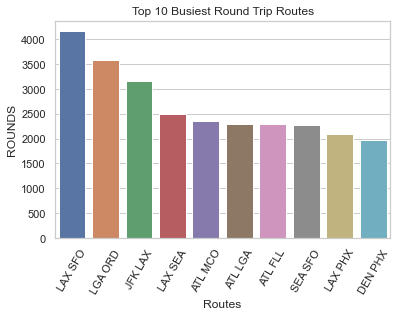

In [2058]:
# barchart for the 10 busiest round trip routes
sns.barplot(x = 'Routes',y='ROUNDS', data = temp)
plt.xticks(rotation=60)
plt.title('Top 10 Busiest Round Trip Routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")

## Q2 The 10 most profitable round trip routes

In [2059]:
# Calculating the profit
# From the instruction we know that we can't use the Tickets data set to determine occupancy.
# Itinerary Fare Per Person. Itinerary fare represents the whole round trip fare if ROUNDTRIP = 1.
# Revenue = PASSENGERS * (Baggage_Fee + ITIN_FARE_AVG) * Rounds
# Cost = (Maintenance_Fee + Depreciation_Fee) * (2 * DISTANCE * Rounds) + Delay_Fee + Docking Fee
# profit = Revenue - Cost (without considering the upfront airplane cost)

final['Cost'] = (8+1.18) * (2 * final['DISTANCE']*final['ROUNDS']) + final['DELAY_DEP_COST']+final['DELAY_ARR_COST']+final['DOCKING_COST_ORIGIN']*final['ROUNDS']+final['DOCKING_COST_DES']*final['ROUNDS']
final['Baggage_Fee'] = final['OCCUPANCY']*0.5*70*final['ROUNDS']*2
final['Ticket_Fee'] =  final['PASSENGERS'] * final['ITIN_FARE_PER_PASSENGER'] * final['ROUNDS']*2
final['Revenue'] = final['Baggage_Fee']+final['Ticket_Fee']
final['Profit'] = final['Revenue']- final['Cost']


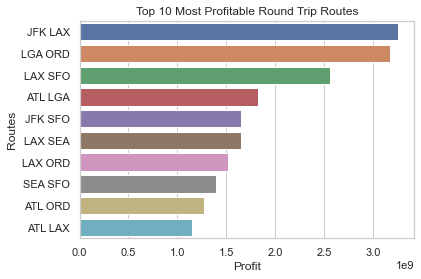

In [2060]:
# barchart for the 10 most profitable round trip routes
temp = final.sort_values(by = ['Profit'],ascending = False).iloc[:10,]
sns.barplot(y = 'Routes',x='Profit', data = temp)
plt.title('Top 10 Most Profitable Round Trip Routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")

In [2061]:
a = temp[['Routes', 'Profit']].iloc[:10]
a

,Routes,Profit
1680,JFK LAX,3258872845.50
1843,LGA ORD,3175599230.76
1804,LAX SFO,2560033292.22
144,ATL LGA,1827191401.76
1701,JFK SFO,1653980359.00
1803,LAX SEA,1648142358.76
1790,LAX ORD,1512129096.40
2338,SEA SFO,1389981029.88
167,ATL ORD,1276103936.44
142,ATL LAX,1153975555.50


## Q3 The 5 round trip routes that you recommend to invest in based on any factors that you choose.

Our Major Goal is to
- Increasing Profit
- Increasing Customer Base
- Making sure a high ROI(Return Of Investment)
- Making sure that there is minimum delay as our motto is "On time, for you"

### Busy Route
The company has decided to start with 5 round trip routes which almost 5 planes to operate
The total_count of routes is for a quarter which is 3 months so approximate 90 days
Let's say a plane flies once everyday
It gives us 90*5 =450. We could fly upto 450 times in a month and we need to make profit in that.
Increasing the value by 20% because we don't know about seasonality. So we would consider the airports as busy, if we have above 600 rounds.

In [2062]:
final['Busy_Route']=np.where((final['ROUNDS']>=600),1,0)

### Top 10 Least Delay Rate in busy round trip routes

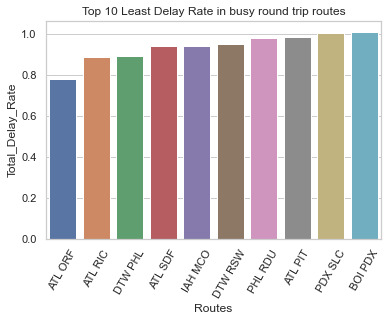

In [2064]:
final['Total_Delay_Rate'] = (final['DELAY_DEP_COUNT']+final['DELAY_ARR_COUNT'])/ final['ROUNDS']
temp = final[final['Busy_Route']==1]
temp =temp.sort_values(by='Total_Delay_Rate',ascending=True)[:10]
# barchart for the 10 least delay in busy round trip routes
sns.barplot(x = 'Routes',y='Total_Delay_Rate', data = temp)
plt.xticks(rotation=60)
plt.title('Top 10 Least Delay Rate in busy round trip routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")

### Top 10 return on investment in busy round trip routes

In [2065]:
# Each airplane is dedicated to one round trip route between the 2 airports, and each airplane will cost $90 million
final['Upfront_Cost'] = 90000000
final['ROI'] = final['Profit']/ final['Upfront_Cost']
temp = final[final['Busy_Route']==1]
temp =temp.sort_values(by='ROI',ascending=False)[:10]

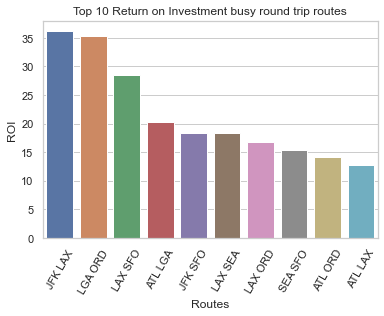

In [2066]:
# barchart for the 10 least delay in busy round trip routes
sns.barplot(x = 'Routes',y='ROI', data = temp)
plt.xticks(rotation=60)
plt.title('Top 10 Return on Investment busy round trip routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")

In [2068]:
final['Profit_Per_Round'] = final['Profit']/ final['ROUNDS']
temp = final[final['Busy_Route']==1]
temp =temp.sort_values(by='Profit_Per_Round',ascending=False)[:10]

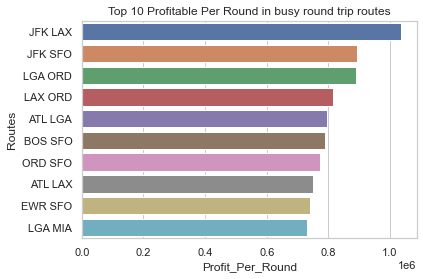

In [2069]:
# barchart for the top 10 profitable per round in busy round trip routes
sns.barplot(y = 'Routes',x='Profit_Per_Round', data = temp)
plt.title('Top 10 Profitable Per Round in busy round trip routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")

### Building Score metric
First we will be normalizing Profit, Rounds and Delay Rate in between 0,1 and these will be our scores individually.
For profit,ROI,and Rounds increasing scores means good scores but for Delay Rate it would be inverse. So after normalizing we would negate it by 1
Then defining our score metric. It would be our weighted_average. We will have 25% weightage on delay rate, 25% on Rounds, 25% on ROI and 25% on profit per round.

In [2070]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp[['Profit_Per_Round','ROUNDS','ROI']])
temp['Total_Delay_Rate_SCALER']=temp['Total_Delay_Rate'].tolist()
temp['Non_Delay_Rate_SCALER']=1-temp['Total_Delay_Rate']

temp['Profit_Per_Round_SCALER']=x_scaled[:,0].tolist()
temp['ROUNDS_SCALER']=x_scaled[:,1].tolist()
temp['ROI_SCALER']=x_scaled[:,2].tolist()
temp['score']=0.25*temp['Non_Delay_Rate_SCALER']+0.25*temp['Profit_Per_Round_SCALER']+0.25*temp['ROUNDS_SCALER']+0.25*temp['ROI']

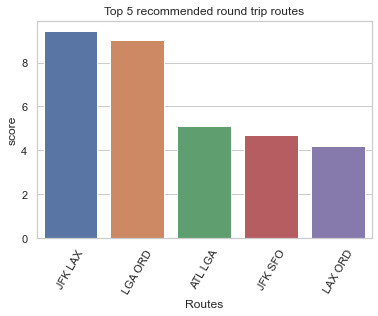

In [2072]:
# barchart for the top 5 recommended round trip routes
temp =temp.sort_values(by='score',ascending=False)[:5]
sns.barplot(x = 'Routes',y='score', data = temp)
plt.xticks(rotation=60)
plt.title('Top 5 recommended round trip routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")

## Q4 The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. 

In [2073]:
temp['Num_Breakeven'] = temp['Upfront_Cost']/ temp['Profit_Per_Round']
temp =temp.sort_values(by='score',ascending=False)[:5]
temp[['Routes','Num_Breakeven']]

,Routes,Num_Breakeven
1680,JFK LAX,86.98
1843,LGA ORD,101.26
144,ATL LGA,113.02
1701,JFK SFO,100.67
1790,LAX ORD,110.26


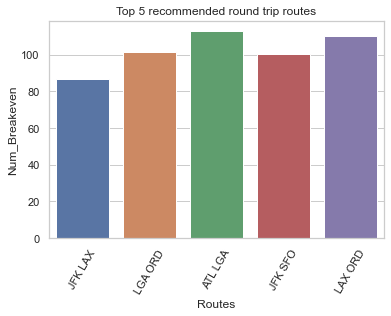

In [2074]:
# barchart for the number of round trip flights to breakeven for top 5 recommended round trip routes
sns.barplot(x = 'Routes',y='Num_Breakeven', data = temp)
plt.xticks(rotation=60)
plt.title('Top 5 recommended round trip routes')
sns.set_theme(style = 'whitegrid')
sns.set_color_codes("muted")